# Сборный проект - 2

**Описание проекта**

Вы работаете в стартапе, который продаёт продукты питания. Нужно разобраться, как ведут себя пользователи вашего мобильного приложения.

Изучите воронку продаж. Узнайте, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? На каких именно?

После этого исследуйте результаты A/A/B-эксперимента. Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Выясните, какой шрифт лучше.

Создание двух групп A вместо одной имеет определённые преимущества. Если две контрольные группы окажутся равны, вы можете быть уверены в точности проведенного тестирования. Если же между значениями A и A будут существенные различия, это поможет обнаружить факторы, которые привели к искажению результатов. Сравнение контрольных групп также помогает понять, сколько времени и данных потребуется для дальнейших тестов.

В случае общей аналитики и A/A/B-эксперимента работайте с одними и теми же данными. В реальных проектах всегда идут эксперименты. Аналитики исследуют качество работы приложения по общим данным, не учитывая принадлежность пользователей к экспериментам.

**Описание данных**

Каждая запись в логе — это действие пользователя, или событие. 
* EventName — название события;
* DeviceIDHash — уникальный идентификатор пользователя;
* EventTimestamp — время события;
* ExpId — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.

**Шаг 1. Откройте файл с данными и изучите общую информацию**

Путь к файлу: /datasets/logs_exp.csv.

**Шаг 2. Подготовьте данные**
* Замените названия столбцов на удобные для вас;
* Проверьте пропуски и типы данных. Откорректируйте, если нужно;
* Добавьте столбец даты и времени, а также отдельный столбец дат;

**Шаг 3. Изучите и проверьте данные**
* Сколько всего событий в логе?
* Сколько всего пользователей в логе?
* Сколько в среднем событий приходится на пользователя?
* Данными за какой период вы располагаете? Найдите максимальную и минимальную дату. Постройте гистограмму по дате и времени. Можно ли быть уверенным, что у вас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определите, с какого момента данные полные и отбросьте более старые. Данными за какой период времени вы располагаете на самом деле?
* Много ли событий и пользователей вы потеряли, отбросив старые данные?
* Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп.

**Шаг 4. Изучите воронку событий**
* Посмотрите, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте.
* Посчитайте, сколько пользователей совершали каждое из этих событий. Отсортируйте события по числу пользователей. Посчитайте долю пользователей, которые хоть раз совершали событие.
* Предположите, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.
* По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитайте отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.
* На каком шаге теряете больше всего пользователей?
* Какая доля пользователей доходит от первого события до оплаты?

**Шаг 5. Изучите результаты эксперимента**
* Сколько пользователей в каждой экспериментальной группе?
* Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверьте, находят ли статистические критерии разницу между выборками 246 и 247.
* Выберите самое популярное событие. Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие. Проверьте, будет ли отличие между группами статистически достоверным. Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?
* Аналогично поступите с группой с изменённым шрифтом. Сравните результаты с каждой из контрольных групп в отдельности по каждому событию. Сравните результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?
* Какой уровень значимости вы выбрали при проверке статистических гипотез выше? Посчитайте, сколько проверок статистических гипотез вы сделали. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Какой уровень значимости стоит применить? Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы.

Импортируем **библиотеки**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import math
import scipy.stats as stats
from scipy import stats as st
from datetime import datetime, timedelta
%matplotlib inline

Настраиваем **вывод данных**

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:,.2f}'.format
sns.set(rc={'figure.figsize':(15,7)})

## Откроем файл с данными и изучим общую информацию

In [3]:
logs_exp = pd.read_csv('https://code.s3.yandex.net/datasets//logs_exp.csv', sep='\t')

Первый взгляд на **датасет**

In [4]:
display(logs_exp.head(10))

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
5,CartScreenAppear,6217807653094995999,1564055323,248
6,OffersScreenAppear,8351860793733343758,1564066242,246
7,MainScreenAppear,5682100281902512875,1564085677,246
8,MainScreenAppear,1850981295691852772,1564086702,247
9,MainScreenAppear,5407636962369102641,1564112112,246


Изучим основые **характеристики**

In [5]:
# общая информация
display(logs_exp.info())

# разберем отдельно каждый столбец
for column in logs_exp.columns:
        print('Название :', column)
        print('Пропуски :', logs_exp[column].isna().sum())
        print('Значения :', logs_exp[column].unique())                                 
        print()
        
# посмотрим дубликаты
print('Количество дубликатов: ', logs_exp.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


None

Название : EventName
Пропуски : 0
Значения : ['MainScreenAppear' 'PaymentScreenSuccessful' 'CartScreenAppear'
 'OffersScreenAppear' 'Tutorial']

Название : DeviceIDHash
Пропуски : 0
Значения : [4575588528974610257 7416695313311560658 3518123091307005509 ...
 6660805781687343085 7823752606740475984 3454683894921357834]

Название : EventTimestamp
Пропуски : 0
Значения : [1564029816 1564053102 1564054127 ... 1565212483 1565212498 1565212517]

Название : ExpId
Пропуски : 0
Значения : [246 248 247]

Количество дубликатов:  413


**Первые выводы**

* Пропусков по столбцам нет
* Дубликатов 413
* Наименования нужно привести к snake_case
* EventTimestamp тип данных не верный

## Подготовим данные

Создадим **рабочее зеркало**, чтобы всегда иметь возможность обратиться к оригиналу

In [6]:
df = logs_exp.copy()

**Переименуем** столбцы

In [7]:
df = df.rename(columns={"EventName": "event_name",
                        "DeviceIDHash": "user_id",
                        "EventTimestamp": "event_timestamp",
                        "ExpId": "group_id"})

Рассмотрим процентное **отношение дубликатов**

In [8]:
print(f'{df.duplicated().sum() / df.shape[0]:.2%}')

0.17%


Количество дубликатов в датасете **0,17%** от общего количества строк - менее 5ти процентов, можем смело **дропать**

In [9]:
df = df.drop_duplicates().reset_index(drop=True)

**Добавим** два новых столбца

In [10]:
# добавим столбец даты и времени
df['timestamp'] = pd.to_datetime(df.event_timestamp, unit='s')

# добавим столбец с датой
df['date'] = df.timestamp.dt.date

Из описания данных мы знаем, что **group_id** — номер эксперимента:
* 246 и 247 — контрольные группы
* 248 — экспериментальная

заменим на **А1**, **А2** и **В** для удобства восприятия

In [11]:
df['group_id'].replace(to_replace= (246,247,248), value = ('A1', 'A2', 'B'), inplace=True )

Что **получилось** и с чем в итоге будем работать

In [12]:
display(df.head())
display(df.info())

,event_name,user_id,event_timestamp,group_id,timestamp,date
0,MainScreenAppear,4575588528974610257,1564029816,A1,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,A1,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,B,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,B,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,B,2019-07-25 11:48:42,2019-07-25


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243713 entries, 0 to 243712
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_name       243713 non-null  object        
 1   user_id          243713 non-null  int64         
 2   event_timestamp  243713 non-null  int64         
 3   group_id         243713 non-null  object        
 4   timestamp        243713 non-null  datetime64[ns]
 5   date             243713 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 11.2+ MB


None

## Изучим и проверим данные

**Количество логов и пользователей**

In [13]:
print('Всего событий в логе             :', df['event_name'].count())
print('Уникальных видов событий         :', df['event_name'].nunique())
print('Всего пользователей в логе       :', df['user_id'].nunique())
print('Событий на пользователя, среднее :', round(df.shape[0] / df['user_id'].nunique()))

Всего событий в логе             : 243713
Уникальных видов событий         : 5
Всего пользователей в логе       : 7551
Событий на пользователя, среднее : 32


**Период**

In [14]:
print('Начало исследования    :', df.timestamp.min())
print('Окончание исследования :', df.timestamp.max())
print('Продолжительность      :', df.timestamp.max() - df.timestamp.min())

Начало исследования    : 2019-07-25 04:43:36
Окончание исследования : 2019-08-07 21:15:17
Продолжительность      : 13 days 16:31:41


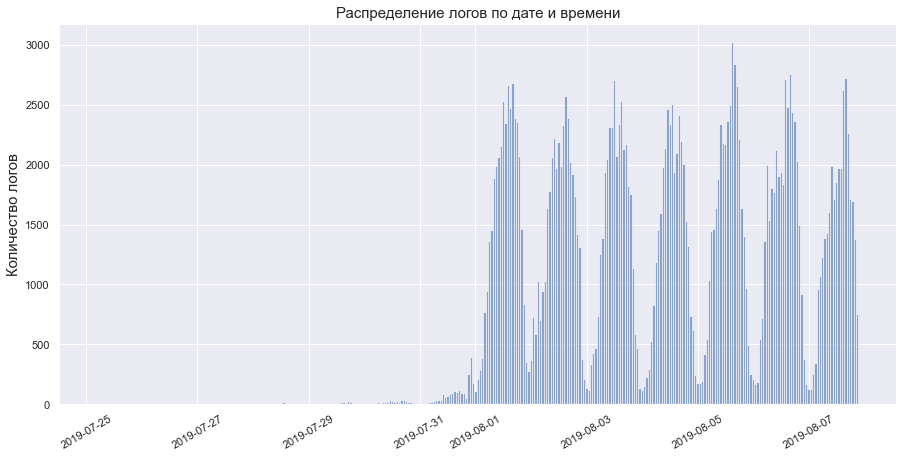

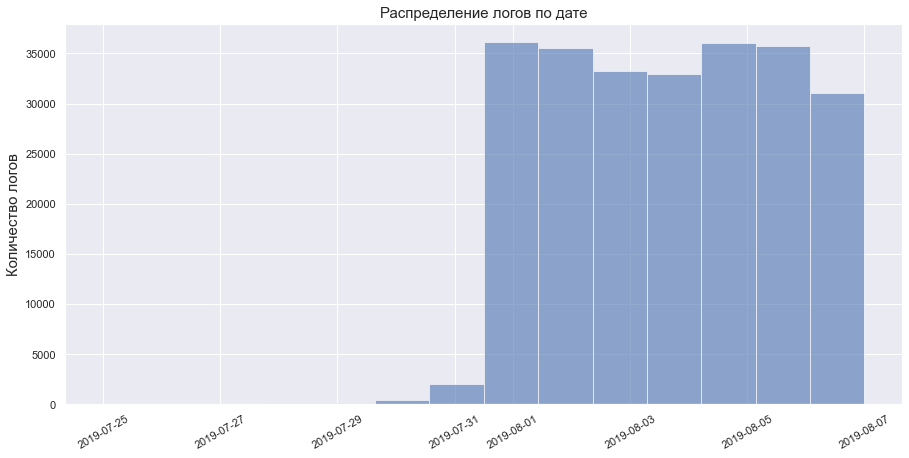

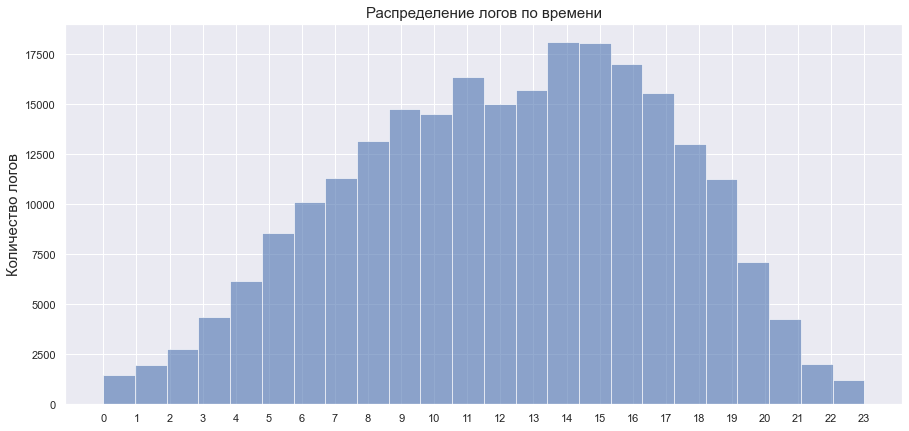

In [15]:
# гистограммы по дате и времени

df['timestamp'].hist(bins=329, xrot=15, alpha=0.6)
plt.title('Распределение логов по дате и времени', fontsize=15)
plt.ylabel('Количество логов', fontsize=15)
plt.xticks(rotation=30)
plt.show()

df['date'].hist(bins=14, xrot=15, alpha=0.6)
plt.title('Распределение логов по дате', fontsize=15)
plt.ylabel('Количество логов', fontsize=15)
plt.xticks(rotation=30)
plt.show()

df['timestamp'].dt.hour.hist(bins=24, alpha=0.6)
plt.title('Распределение логов по времени', fontsize=15)
plt.ylabel('Количество логов', fontsize=15)
plt.xticks(range(0, 24))
plt.show()

В имеющихся данных информация за две недели - **с 25 июля по 7 августа 2019 года**.

Гистограмма распределения логов по дате показывает, что основная часть событий приходится на вторую неделю.

Основная активность пользователей происходит в дневное время.

1 августа происходит резкий скачок количества событий - с 2х тысяч до 36ти: **будем считать данные первой недели устаревшими** и отфильтруем их.

**Очистка данных**

In [16]:
# берем в расчет данные начиная с 01 08 2019
data = df.query('date >= datetime(2019, 8, 1).date()')

In [17]:
print('Группировка до фильтрации')
display(df.groupby('group_id').agg({'user_id':'nunique'}).reset_index())

print('Группировка после фильтрации')
display(data.groupby('group_id').agg({'user_id':'nunique'}).reset_index())

Группировка до фильтрации


,group_id,user_id
0,A1,2489
1,A2,2520
2,B,2542


Группировка после фильтрации


,group_id,user_id
0,A1,2484
1,A2,2513
2,B,2537


In [18]:
print(f'Количество пользователей до очистки : {len(df.user_id.unique())}')
print(f'Количество пользователей после      : {len(data.user_id.unique())}')
print(f'Очищено данных                      : {(1 - (len(data) / len(df))) :.2%}')
print(f'Очищено пользователей               : {(1 - (len(data.user_id.unique()) / len(df.user_id.unique()))) :.2%}')

Количество пользователей до очистки : 7551
Количество пользователей после      : 7534
Очищено данных                      : 1.16%
Очищено пользователей               : 0.23%


Первая неделя исследования захватила лишь 1,16% от общего количества данных: мы отфильтровали
* А1 - 5 человек
* А2 - 7 человек
*  В  - 5 человек

Процент сохраненных данных: **98,84%**

Процент сохраненных пользователей: **99,77%**

## Изучим воронку событий

**События**

In [19]:
display(data['event_name'].value_counts())

MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: event_name, dtype: int64

Всего встречается 5 видов событий:
* **MainScreenAppear** - появление главного экрана
* **OffersScreenAppear** - появление экрана предложений
* **CartScreenAppear** - появление экрана корзины
* **PaymentScreenSuccessful** - появление экрана успешной оплаты
* **Tutorial** - руководство

Первые четыре события образуют **последовательную цепочку движения** пользователя по приложению

Для того, чтобы посмотреть урок (Tutorial: как совершить то или иное действие в приложении) не обязательно что-то покупать: обычно обучение проходят новые пользователи, и чаще всего этот шаг можно пропустить.
    
Поэтому шаг **Tutorial из дальнейшей цепочки убираем** и воронку событий представляем такой:

1. Главный экран
2. Каталог предложений
3. Корзина
4. Экран с подтверждением успешной оплаты

**Пользователи**

Убираем из events событие Tutorial

In [20]:
# сгруппируем таблицу по событиям
events = data[data['event_name'] != 'Tutorial']

events = events.groupby('event_name').agg({'user_id':'nunique'})\
             .sort_values(by='user_id', ascending=False)

events.columns = ['event_users']

events = events.reset_index()

# узнаем процент совершивших действие
events['rate, %'] = events['event_users'] / data['user_id'].nunique() * 100

# узнаем долю пользователей от предыдущего шага
events['filter, %'] = (1- events['event_users'] / events['event_users'].shift(1)) * 100

# узнаем долю пользователей от первого шага - СЛОНА ТО Я НЕ ПРИМЕТИЛ
events['%'] = events['event_users'] / events['event_users'][0] * 100

display(events)

,event_name,event_users,"rate, %","filter, %",%
0,MainScreenAppear,7419,98.47,NaN,100.00
1,OffersScreenAppear,4593,60.96,38.09,61.91
2,CartScreenAppear,3734,49.56,18.70,50.33
3,PaymentScreenSuccessful,3539,46.97,5.22,47.70


* 7534 уникальных пользователя
* 7419 побывало на первом шаге воронки
* 3539 дошли до оплаты

**47,7% пользователей доходит от первого события до оплаты**

Все события выстраиваются в цепочку действий, кроме руководства пользователя (Tutorial).
    
Для того, чтобы посмотреть урок (как совершить то или иное действие в приложении) не обязательно что-то покупать: обычно обучение проходят новые пользователи, и чаще всего этот шаг можно пропустить.
    
Поэтому шаг Tutorial из дальнейшей цепочки убираем и воронку событий представляем такой:

1. Главный экран
2. Каталог предложений
3. Корзина
4. Экран с подтверждением успешной оплаты

**Воронка**

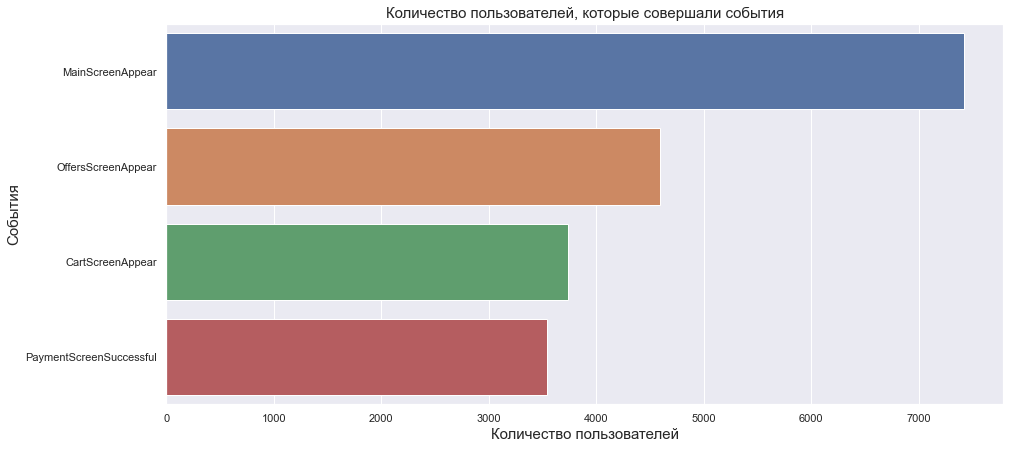

In [21]:
sns.barplot(data=events, x='event_users', y='event_name', orient='h')
plt.title('Количество пользователей, которые совершали события', fontsize=15)
plt.xlabel('Количество пользователей', fontsize=15)
plt.ylabel('События', fontsize=15)
plt.show()

Благодаря визуализации мы можем увидеть **воронку** событий:
1. MainScreenAppear
2. OffersScreenAppear
3. CartScreenAppear
4. PaymentScreenSuccessful

Первый шаг воронки не проходит 1,53% пользователей - получается, на главную страницу заходить не обязательно.

Самый большой скачок - между главной страницей и страницей предложений - почти 40% пользователей туда не приходят. На следующих шагах отсеивается всего 19% и 5% пользователей соответветственно.

Всего до успешной оплаты доходят:
* 46,97% от всех уникальных пользователей приложения
* 47,70% от пользователей, совершивших первое событие

In [22]:
# сфомируем сводную таблицу по пользователям и событиям
users = data.query('event_name != "Tutorial"').pivot_table(
        index=['user_id'], columns='event_name', values='timestamp', aggfunc='min').reset_index()

# создадим маску событий на главный экран, заказ, корзину и оплату
step_1 = (~users['MainScreenAppear'].isna())
step_2 = step_1 & (users['OffersScreenAppear'] > users['MainScreenAppear'])
step_3 = step_2 & (users['CartScreenAppear'] > users['OffersScreenAppear'])
step_4 = step_3 & (users['PaymentScreenSuccessful'] > users['CartScreenAppear'])

# создадим датафрейм по созданным ранее маскам
start_end = pd.DataFrame(columns = ['event', 'users'], data = [
    ['MainScreenAppear', users[step_1].shape[0]],
    ['OffersScreenAppear', users[step_2].shape[0]],
    ['CartScreenAppear', users[step_3].shape[0]],
    ['PaymentScreenSuccessful', users[step_4].shape[0]]
])

start_end['%'] = start_end['users'] / start_end['users'][0] * 100

display(start_end)

,event,users,%
0,MainScreenAppear,7419,100.00
1,OffersScreenAppear,4201,56.62
2,CartScreenAppear,1767,23.82
3,PaymentScreenSuccessful,454,6.12


## Изучим результаты эксперимента

**Пользователи в каждой группе**

In [23]:
# для анализа используем вторую неделю исследований
display(data.groupby('group_id').agg({'user_id':'nunique'}).reset_index())

,group_id,user_id
0,A1,2484
1,A2,2513
2,B,2537


**Критерии успешного A/A-теста:**
* Количество пользователей в различных группах различается не более, чем на 1%;
* Для всех групп фиксируют и отправляют в системы аналитики данные об одном и том же;
* Различие ключевых метрик по группам не превышает 1% и не имеет статистической значимости;
* Попавший в одну из групп посетитель остаётся в этой группе до конца теста. Если пользователь видит разные версии исследуемой страницы в ходе одного исследования, неизвестно, какая именно повлияла на его решения. Значит, и результаты такого теста нельзя интерпретировать однозначно.

In [24]:
# проверим пользователей на одновременное нахождение в нескольких группах
display(len(data.groupby('user_id')['group_id'].nunique().reset_index().query('group_id > 1')))

0

In [25]:
test = (data.
          groupby(['event_name', 'group_id']).
          agg({'user_id': 'nunique'}).
          reset_index().
          rename(columns={'user_id' : 'total_users'}).
          sort_values(by=['group_id','total_users'], ascending=False))

# исключим Tutorial
test = test[test['event_name'] != 'Tutorial']
display(test)

,event_name,group_id,total_users
5,MainScreenAppear,B,2493
8,OffersScreenAppear,B,1531
2,CartScreenAppear,B,1230
11,PaymentScreenSuccessful,B,1181
4,MainScreenAppear,A2,2476
7,OffersScreenAppear,A2,1520
1,CartScreenAppear,A2,1238
10,PaymentScreenSuccessful,A2,1158
3,MainScreenAppear,A1,2450
6,OffersScreenAppear,A1,1542


In [26]:
# Входные параметры:
# - df1, df2 - группы
# - event    - событие
# - alpha    - критический уровень статистической значимости
# - n        - поправка Боннферони

# !!! формула универсальна для разных значений alpha и n в случае корректировки!!!

def aab_test(df1, df2, event, alpha, n):
    # критический уровень статистической значимости c поправкой Бонферрони
    bonferroni_alpha = alpha / n
 
    # число пользователей в группе 1 и группе 2:
    n_users = np.array([df1['user_id'].nunique(), 
                        df2['user_id'].nunique()])

    # число пользователей, совершивших событие в группе 1 и группе 2
    success = np.array([df1[df1['event_name'] == event]['user_id'].nunique(), 
                        df2[df2['event_name'] == event]['user_id'].nunique()])

    # пропорции успехов в группах:
    p1 = success[0]/n_users[0]
    p2 = success[1]/n_users[1]
    
    # пропорция успехов в комбинированном датасете:
    p_combined = (success[0] + success[1]) / (n_users[0] + n_users[1])

    # разница пропорций в датасетах
    difference = p1 - p2 

    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference /  np.sqrt(p_combined * (1 - p_combined) * (1/n_users[0] + 1/n_users[1]))

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)  

    p_value = (1 - distr.cdf(abs(z_value))) * 2   #тест двусторонний, удваиваем результат
    
    print('Событие   :', event)
    print('p-значение: ', p_value)

    if p_value < bonferroni_alpha:
        print('Отвергаем нулевую гипотезу: между долями есть разница')
    else:
        print('Не получилось отвергнуть нулевую гипотезу: нет оснований считать доли разными')

Нам нужно сопоставить доли по каждому событию между:

* контрольными группами А1 и А2
* каждой из контрольной группы к экспериментальной: А1-В и А2-В
* объединенной контрольной группой и экспериментальной А=А1+А2 и В

У нас 4 вида событий для каждой из 3х групп исследования: поправку Бонферрони мы вводим 4 чтобы застраховать себя от ложного результата

**n = 4**

При уровне значимости 0.1 каждый десятый раз можно получать ложный результат: назначим уровень 0.05

**alpha = 0.05**

**Введем основную и альтернативные гипотезы**

* **Н0** - доли уникальных посетителей этапа воронки одинаковы
* **Н1** - доли уникальных посетителей этапа воронки отличаются

In [27]:
# разобьем пользователей по группам
A1 = data[data['group_id'] == 'A1']
A2 = data[data['group_id'] == 'A2']
A = data[data['group_id'] != 'B']
B = data[data['group_id'] == 'B']

In [28]:
# проверим статистически значимую разницу между А1 и А2
for event in test['event_name'].unique():
    aab_test(A1, A2, event, 0.05, 4)
    print()

Событие   : MainScreenAppear
p-значение:  0.7570597232046099
Не получилось отвергнуть нулевую гипотезу: нет оснований считать доли разными

Событие   : OffersScreenAppear
p-значение:  0.2480954578522181
Не получилось отвергнуть нулевую гипотезу: нет оснований считать доли разными

Событие   : CartScreenAppear
p-значение:  0.22883372237997213
Не получилось отвергнуть нулевую гипотезу: нет оснований считать доли разными

Событие   : PaymentScreenSuccessful
p-значение:  0.11456679313141849
Не получилось отвергнуть нулевую гипотезу: нет оснований считать доли разными



**доли А1 и А2 равны**

Главная цель А/А-теста — показать, можно ли доверять результатам эксперимента, который будет запущен в тех же условиях, но уже с разными вариантами шрифта: среди А1 и А2 победителя выявить не удалось, значит, **можем запускать А/B-тест**

In [29]:
# проверим статистически значимую разницу между А1 и В
for event in test['event_name'].unique():
    aab_test(A1, B, event, 0.05, 4)
    print()

Событие   : MainScreenAppear
p-значение:  0.2949721933554552
Не получилось отвергнуть нулевую гипотезу: нет оснований считать доли разными

Событие   : OffersScreenAppear
p-значение:  0.20836205402738917
Не получилось отвергнуть нулевую гипотезу: нет оснований считать доли разными

Событие   : CartScreenAppear
p-значение:  0.07842923237520116
Не получилось отвергнуть нулевую гипотезу: нет оснований считать доли разными

Событие   : PaymentScreenSuccessful
p-значение:  0.2122553275697796
Не получилось отвергнуть нулевую гипотезу: нет оснований считать доли разными



**доли А1 и В равны**

In [30]:
# проверим статистически значимую разницу между А2 и В
for event in test['event_name'].unique():
    aab_test(A2, B, event, 0.05, 4)
    print()

Событие   : MainScreenAppear
p-значение:  0.4587053616621515
Не получилось отвергнуть нулевую гипотезу: нет оснований считать доли разными

Событие   : OffersScreenAppear
p-значение:  0.9197817830592261
Не получилось отвергнуть нулевую гипотезу: нет оснований считать доли разными

Событие   : CartScreenAppear
p-значение:  0.5786197879539783
Не получилось отвергнуть нулевую гипотезу: нет оснований считать доли разными

Событие   : PaymentScreenSuccessful
p-значение:  0.7373415053803964
Не получилось отвергнуть нулевую гипотезу: нет оснований считать доли разными



**доли А2 и В равны**

In [31]:
# проверим статистически значимую разницу между А и В
for event in test['event_name'].unique():
    aab_test(A, B, event, 0.05, 4)
    print()

Событие   : MainScreenAppear
p-значение:  0.29424526837179577
Не получилось отвергнуть нулевую гипотезу: нет оснований считать доли разными

Событие   : OffersScreenAppear
p-значение:  0.43425549655188256
Не получилось отвергнуть нулевую гипотезу: нет оснований считать доли разными

Событие   : CartScreenAppear
p-значение:  0.18175875284404386
Не получилось отвергнуть нулевую гипотезу: нет оснований считать доли разными

Событие   : PaymentScreenSuccessful
p-значение:  0.6004294282308704
Не получилось отвергнуть нулевую гипотезу: нет оснований считать доли разными



**доли А и В равны**

## Вывод

**Шаг 1: Откройте файл с данными и изучите общую информацию**

Прочитав /datasets/logs_exp.csv мы узнали:
* пропусков по столбцам нет
* дубликатов 413
* наименования нужно привести к snake_case
* EventTimestamp тип данных не верный

Данные нуждались в предобработке

**Шаг 2: Подготовьте данные**

На данном шаге мы провели работы:
* создали рабочее зеркало
* переименовали столбцы
* удалили дубликаты
* добавили два новых столбца
* переименовали группы

**Шаг 3: Изучите и проверьте данные**

* Всего событий в логе             : 243713
* Уникальных видов событий         : 5
* Всего пользователей в логе       : 7551
* Событий на пользователя, среднее : 32
* Начало исследования              : 2019-07-25 04:43:36
* Окончание исследования           : 2019-08-07 21:15:17
* Продолжительность                : 13 days 16:31:41
* гистограмма распределения логов по дате показывает, что основная часть событий приходится на вторую неделю
* мы провели очистку, взяв за анализ 2ую неделю эксперимента, и сохранив 98,84% от первоначальных данных

**Шаг 4: Изучите воронку событий**

* Всего встречается 5 видов событий:
1. MainScreenAppear        - появление главного экрана        - 117328
2. OffersScreenAppear      - появление экрана предложений     - 46333
3. CartScreenAppear        - появление экрана корзины         - 42303
4. PaymentScreenSuccessful - появление экрана успешной оплаты - 33918
5. Tutorial                - руководство                      - 1005
* Составили процент отсева пользователей на каждом событии:
1. MainScreenAppear        - 7419 - 98.47%
2. OffersScreenAppear      - 4593 - 60.96%
3. CartScreenAppear        - 3734 - 49.56%
4. PaymentScreenSuccessful - 3539 - 46.97%
5. Tutorial                - 840  - 11.15%
* Первые четыре события образуют последовательную цепочку движения пользователя по приложению
* Первый шаг воронки не проходит 1,53% пользователей
* Самый большой скачок - между главной страницей и страницей предложений - почти 40% пользователей туда не приходят. На следующих шагах отсеивается всего 19% и 5% пользователей соответветственно
* Всего до успешной оплаты доходят 46,97% от всех уникальных пользователей приложения и 47,7% от совершивших первое событие
* От первого события до оплаты доходит лишь 6,12% пользователей

**Шаг 5: Изучите результаты эксперимента**

Мы выдвинули гипотезу о равенстве долей разных групп на каждом из этапов воронки, сравнив
* А1 и А2: не получилось отвергнуть нулевую гипотезу (нет оснований считать доли разными)

Тест не нашел статистически значимых различий между группами А1 и А2, что позволило нам в дальнейшем рассматривать результаты А/В-тестирования

* А1 и В: не получилось отвергнуть нулевую гипотезу (нет оснований считать доли разными)
* А2 и В: не получилось отвергнуть нулевую гипотезу (нет оснований считать доли разными)
* А и В: не получилось отвергнуть нулевую гипотезу (нет оснований считать доли разными)

**Вывод: дизайнерское решение поменять шрифты во всём приложении не играют большой роли для пользователей**